### Comparison between Bagging and Random Forest:

| Aspect                  | Bagging                                       | Random Forest                               |
|-------------------------|-----------------------------------------------|---------------------------------------------|
| Base Algorithm          | Any base learner (commonly decision trees)    | Decision trees                             |
| Feature Selection       | Typically uses all features                   | Randomly selects subset of features        |
| Randomness              | Only randomizes data through bootstrap samples| Randomizes both data and features          |
| Voting/Averaging        | Averages predictions of all base learners     | Averages predictions of multiple decision trees |
| Correlation             | Base learners may be correlated               | Base learners are decorrelated             |
| Bias-Variance Tradeoff | Reduces variance, but may not reduce bias      | Reduces both variance and bias             |
| Model Performance       | Generally less complex than Random Forest     | Often more accurate than simple Bagging    |
| Computational Cost      | Typically lower computational cost compared to Random Forest | Higher computational cost due to feature randomization |

This table summarizes the key differences between Bagging and Random Forest across various aspects such as base algorithm, feature selection, randomness, bias-variance tradeoff, model performance, and computational cost.

Yes, tree-level sampling and node-level sampling are additional differences between Bagging and Random Forest. Here's a comparison:

| Aspect                  | Bagging                                       | Random Forest                               |
|-------------------------|-----------------------------------------------|---------------------------------------------|
| Tree-Level Sampling     | Each base learner is trained on a bootstrap sample of the data | Each decision tree is trained on a bootstrap sample of the data, but also with a random subset of features |
| Node-Level Sampling     | Not typically applied                         | Each split in a decision tree considers only a random subset of features, reducing correlation between trees and making them more diverse |

In Bagging, each base learner (typically a decision tree) is trained on a bootstrap sample of the data, meaning that the data is randomly sampled with replacement. However, the entire feature set is usually considered at each split in the decision tree.

In Random Forest, in addition to the bootstrap sampling of data at the tree level, each split in each decision tree is made by considering only a random subset of features. This is known as node-level sampling or feature bagging. By restricting the features available at each split, Random Forest further reduces the correlation between trees, leading to more diverse trees and typically better generalization performance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.650499,1.180226,2.129498,0.540291,-2.201771,1
1,-0.802883,-1.555431,-2.291905,1.005138,1.925012,1
2,-1.131899,2.500539,-0.898763,-2.338148,-0.252625,0
3,-0.552121,0.190186,-0.111673,2.764710,3.178115,1
4,-0.821101,-0.472944,-0.718016,-0.338048,-1.834181,0


In [4]:
bag = BaggingClassifier(max_features=2)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

### Tree-Level Sampling

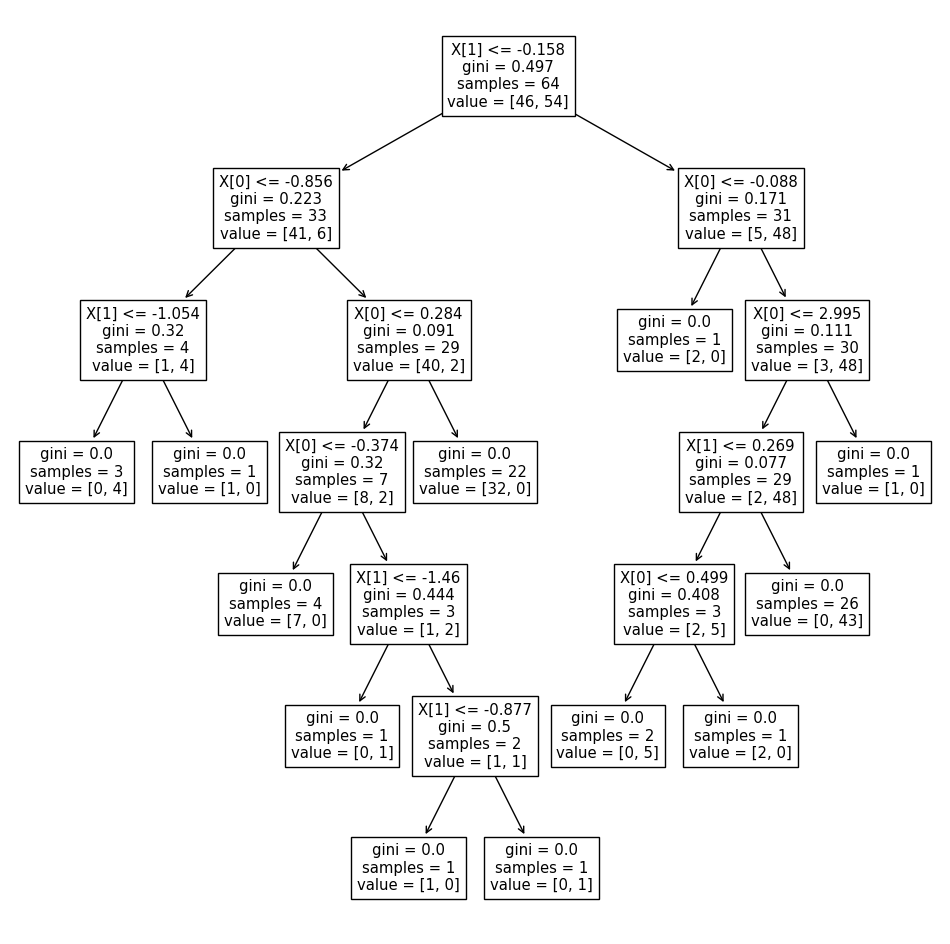

In [6]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [7]:
rf = RandomForestClassifier(max_features=2)

In [8]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

### Node-Level Sampling

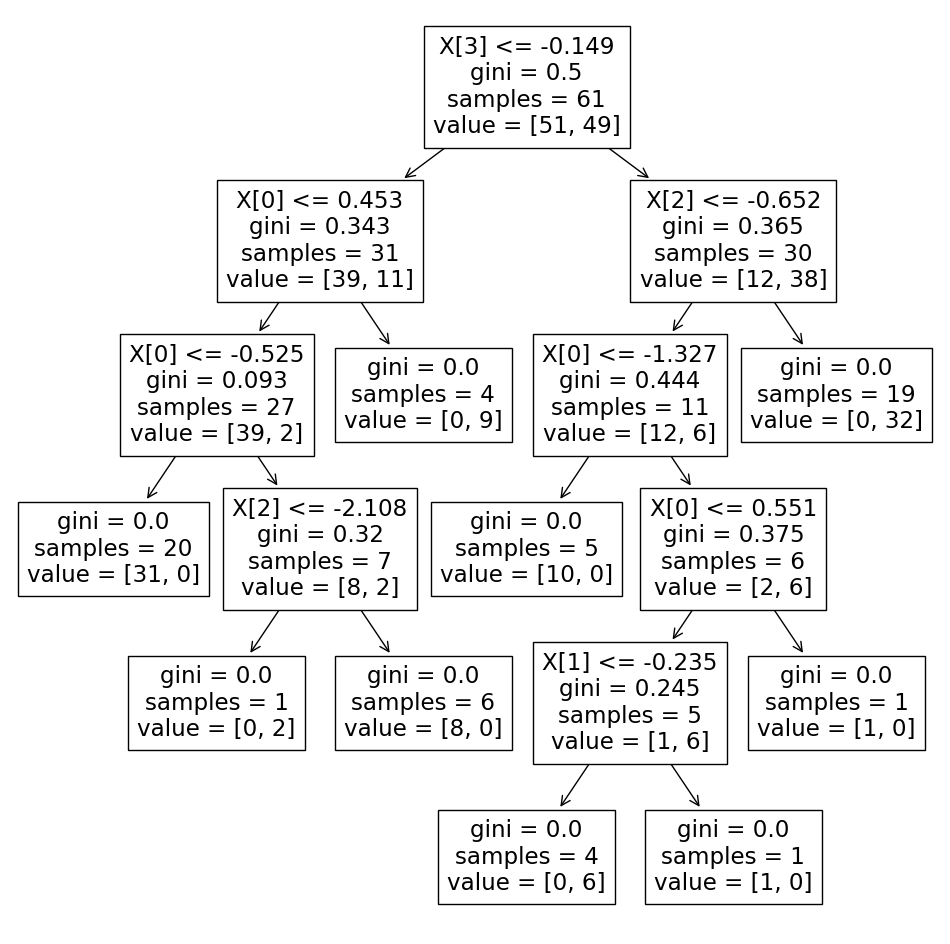

In [9]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()


**Tree-Level Sampling**:

- **What it does**: 
    - In tree-level sampling, each tree in the ensemble (collection of trees) is trained on a different subset of the original data.
- **Explanation**:
    - Imagine you have a big bag of marbles representing your dataset. With tree-level sampling, you're creating multiple smaller bags by randomly picking marbles from the big bag, but you're allowed to put them back in the big bag (sampling with replacement). Each of these smaller bags will be used to train a different decision tree.
- **Purpose**:
    - By training each tree on a different subset of data, you're essentially creating different perspectives or views of the dataset. This helps to reduce overfitting because each tree is seeing a slightly different version of the data, so they won't all make the same mistakes.

**Node-Level Sampling**:

- **What it does**:
    - In node-level sampling, each split in a decision tree considers only a random subset of features.
- **Explanation**:
    - Think of each decision point in a tree as a question being asked about the data. Instead of considering all possible questions (features) at each decision point, node-level sampling randomly selects only a few questions to consider. So, at each fork in the tree, only a subset of features are available to make the decision.
- **Purpose**:
    - By limiting the features available at each decision point, you're preventing the tree from becoming too focused on a single aspect of the data. This encourages the tree to consider different features at different points, leading to more diverse and robust trees in the ensemble.

In summary, tree-level sampling creates different subsets of the data for each tree, while node-level sampling restricts the features available at each decision point within each tree. Both techniques help to improve the overall performance and robustness of the ensemble model, such as in Random Forest.